In [ ]:
import seaborn as sns
tips =sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Axes: xlabel='total_bill', ylabel='tip'>

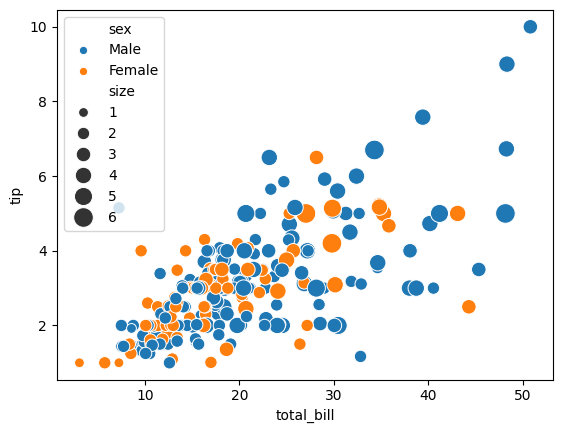

In [ ]:
sns.scatterplot(x='total_bill',y='tip',hue='sex',size='size',sizes=(50,200),data=tips)

In [ ]:
import seaborn as sns

In [ ]:
fmri=sns.load_dataset('fmri')

In [ ]:
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


<Axes: xlabel='timepoint', ylabel='signal'>

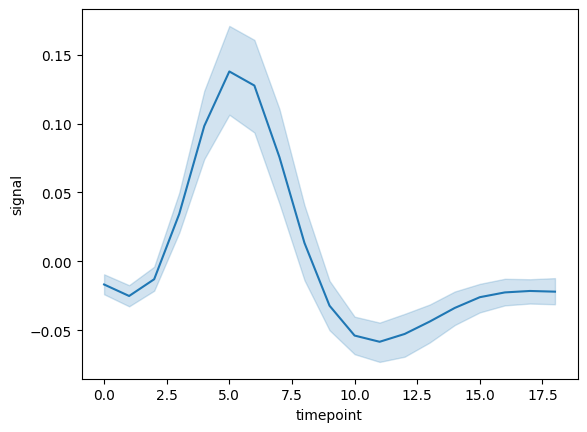

In [ ]:
sns.lineplot(x='timepoint',y='signal',data=fmri)

<Axes: xlabel='timepoint', ylabel='signal'>

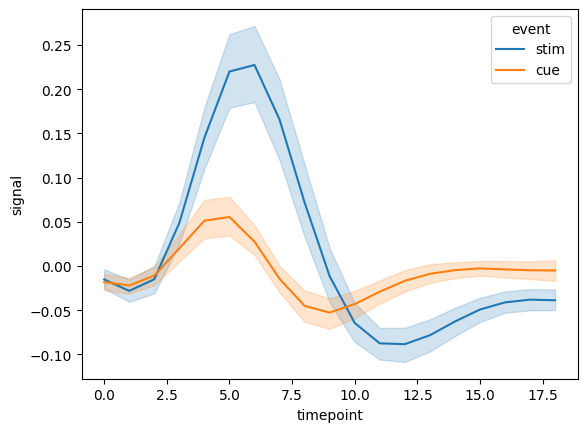

In [ ]:
sns.lineplot(x='timepoint',y='signal',hue='event',data=fmri)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


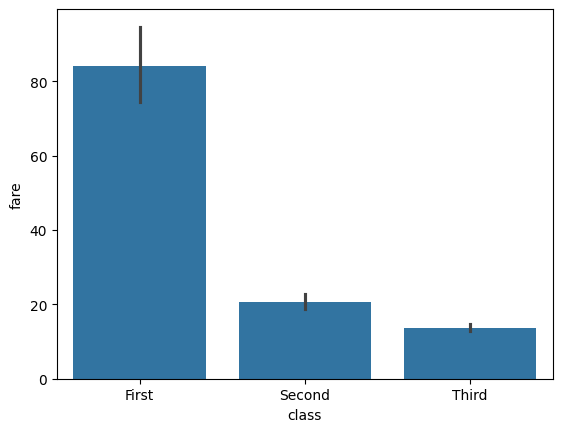

In [ ]:
titanic=sns.load_dataset('titanic')
sns.barplot(x='class',y='fare',data=titanic)
titanic.head()

<Axes: xlabel='fare', ylabel='class'>

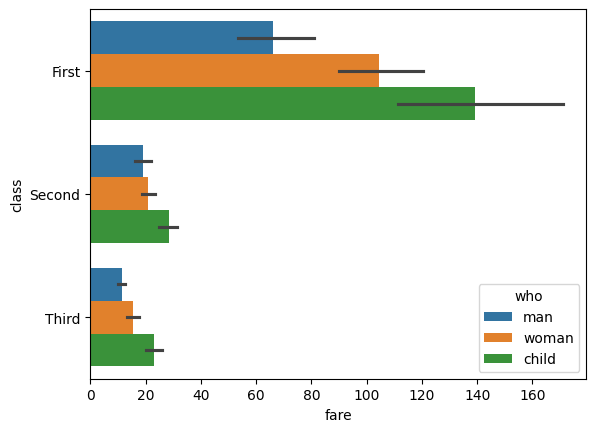

In [ ]:
titanic=sns.load_dataset('titanic')
sns.barplot(x='fare',y='class',hue='who'
,data=titanic)

<Axes: xlabel='fare', ylabel='Count'>

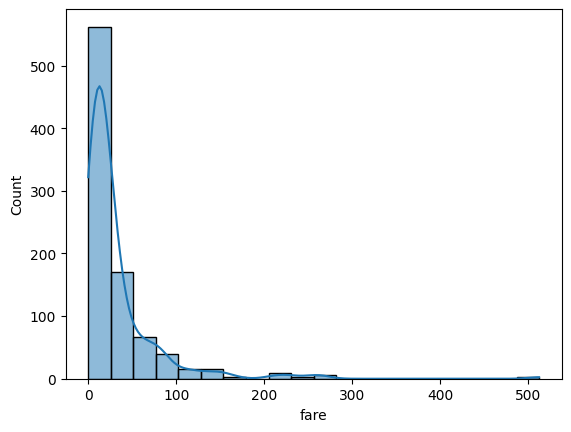

In [ ]:
iris=sns.load_dataset('iris')

sns.histplot(x='fare',bins=20,kde=True,data=titanic)

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
import pandas as pd
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data=pd.read_csv('/content/drive/MyDrive/workshop/placementdata.csv')

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
data.head()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,ExtracurricularActivities,PlacementTraining,SSC_Marks,HSC_Marks,PlacementStatus
0,1,7.5,1,1,1,65,4.4,No,No,61,79,NotPlaced
1,2,8.9,0,3,2,90,4.0,Yes,Yes,78,82,Placed
2,3,7.3,1,2,2,82,4.8,Yes,No,79,80,NotPlaced
3,4,7.5,1,1,2,85,4.4,Yes,Yes,81,80,Placed
4,5,8.3,1,2,2,86,4.5,Yes,Yes,74,88,Placed


In [ ]:
data.duplicated().sum()

0

In [ ]:
data.isnull().sum()

,0
StudentID,0
CGPA,0
Internships,0
Projects,0
Workshops/Certifications,0
AptitudeTestScore,0
SoftSkillsRating,0
ExtracurricularActivities,0
PlacementTraining,0
SSC_Marks,0


In [ ]:
data.shape

(10000, 12)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  object 
 8   PlacementTraining          10000 non-null  object 
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  object 
dtypes: float64(2), int64(7), object(3)
memory usage: 937.6+ KB


In [ ]:
data.describe()

,StudentID,CGPA,Internships,Projects,Workshops/Certifications,AptitudeTestScore,SoftSkillsRating,SSC_Marks,HSC_Marks
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,7.698010,1.049200,2.026600,1.013200,79.449900,4.323960,69.159400,74.501500
std,2886.89568,0.640131,0.665901,0.867968,0.904272,8.159997,0.411622,10.430459,8.919527
min,1.00000,6.500000,0.000000,0.000000,0.000000,60.000000,3.000000,55.000000,57.000000
25%,2500.75000,7.400000,1.000000,1.000000,0.000000,73.000000,4.000000,59.000000,67.000000
50%,5000.50000,7.700000,1.000000,2.000000,1.000000,80.000000,4.400000,70.000000,73.000000
75%,7500.25000,8.200000,1.000000,3.000000,2.000000,87.000000,4.700000,78.000000,83.000000
max,10000.00000,9.100000,2.000000,3.000000,3.000000,90.000000,4.800000,90.000000,88.000000


<Axes: xlabel='PlacementStatus'>

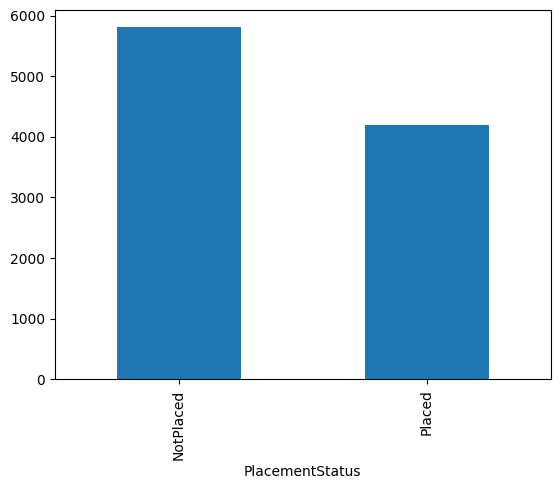

In [ ]:
data['PlacementStatus'].value_counts().plot(kind='bar')

In [ ]:
data['PlacementStatus'].value_counts()/len(data)*100

,count
PlacementStatus,
NotPlaced,58.03
Placed,41.97


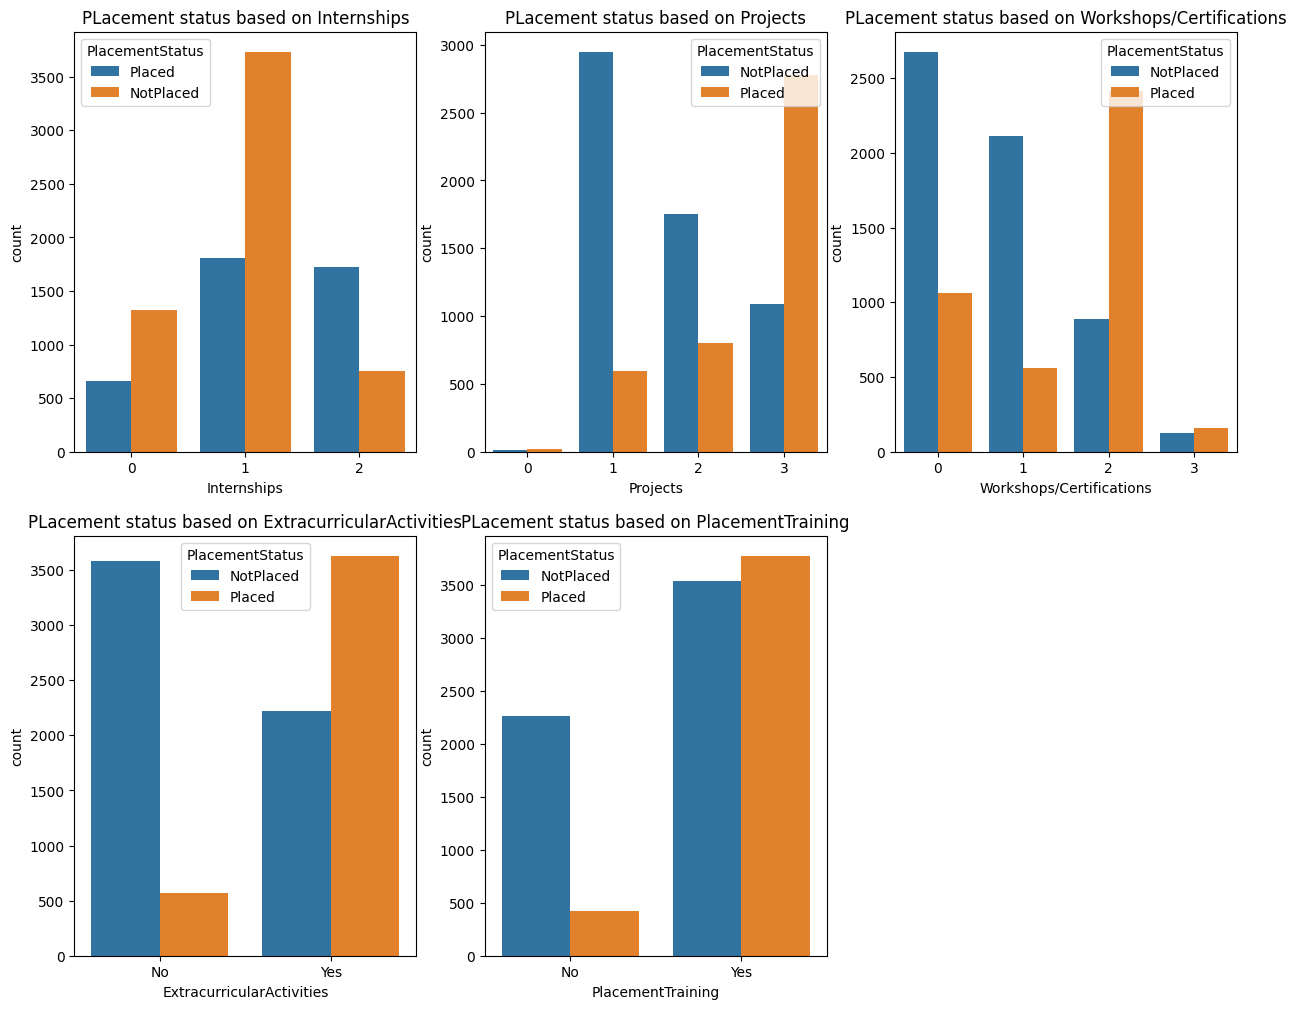

In [ ]:

placement_plot=['Internships','Projects','Workshops/Certifications','ExtracurricularActivities','PlacementTraining']
plt.figure(figsize=(15,12))
for i,graph in enumerate(placement_plot):
  plt.subplot(2,3,i+1)
  sns.countplot(x=graph,data=data,hue='PlacementStatus')
  plt.title(f'PLacement status based on {graph}')

**Insight**

Graph 1:Internships are not really relavant

Graph 2:Projects is relavent to placement status

Graph 3:

Graph 4:

In [ ]:
num_col=data.select_dtypes('number')
num_col.columns.tolist()
non_num_col=data.select_dtypes('object')
non_num_col.columns.tolist()

[]

In [ ]:
data['PlacementStatus'].replace({'Placed':1,'NotPlaced':0},inplace=True)

<ipython-input-107-225f7f0da25d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['PlacementStatus'].replace({'Placed':1,'NotPlaced':0},inplace=True)


In [ ]:
data['PlacementStatus'].head()

,PlacementStatus
0,0
1,1
2,0
3,1
4,1


In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['PlacementStatus']=le.fit_transform(data['PlacementStatus'])
data['ExtracurricularActivities']=le.fit_transform(data['ExtracurricularActivities'])
data['PlacementTraining']=le.fit_transform(data['PlacementTraining'])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   StudentID                  10000 non-null  int64  
 1   CGPA                       10000 non-null  float64
 2   Internships                10000 non-null  int64  
 3   Projects                   10000 non-null  int64  
 4   Workshops/Certifications   10000 non-null  int64  
 5   AptitudeTestScore          10000 non-null  int64  
 6   SoftSkillsRating           10000 non-null  float64
 7   ExtracurricularActivities  10000 non-null  int64  
 8   PlacementTraining          10000 non-null  int64  
 9   SSC_Marks                  10000 non-null  int64  
 10  HSC_Marks                  10000 non-null  int64  
 11  PlacementStatus            10000 non-null  int64  
dtypes: float64(2), int64(10)
memory usage: 937.6 KB


In [ ]:
x=data.drop(['PlacementStatus','StudentID'],axis=1)
y=data['PlacementStatus']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
scaler=StandardScaler()
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
# x_train=scaler.fit_transform(x_train)
# x_test=scaler.transform(x_test)

In [ ]:
model=DecisionTreeClassifier()
model.fit(x_train_scaled,y_train)

DecisionTreeClassifier()

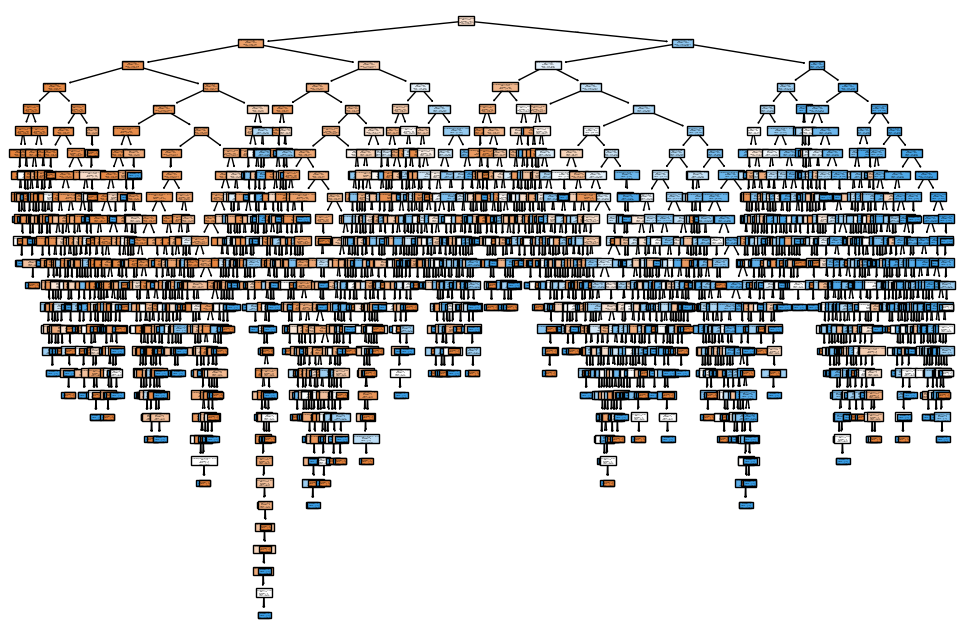

In [ ]:
plt.figure(figsize=(12,8))
plot_tree(model,filled=True,feature_names=x.columns,class_names=['Placed','NotPlaced'])
plt.show()

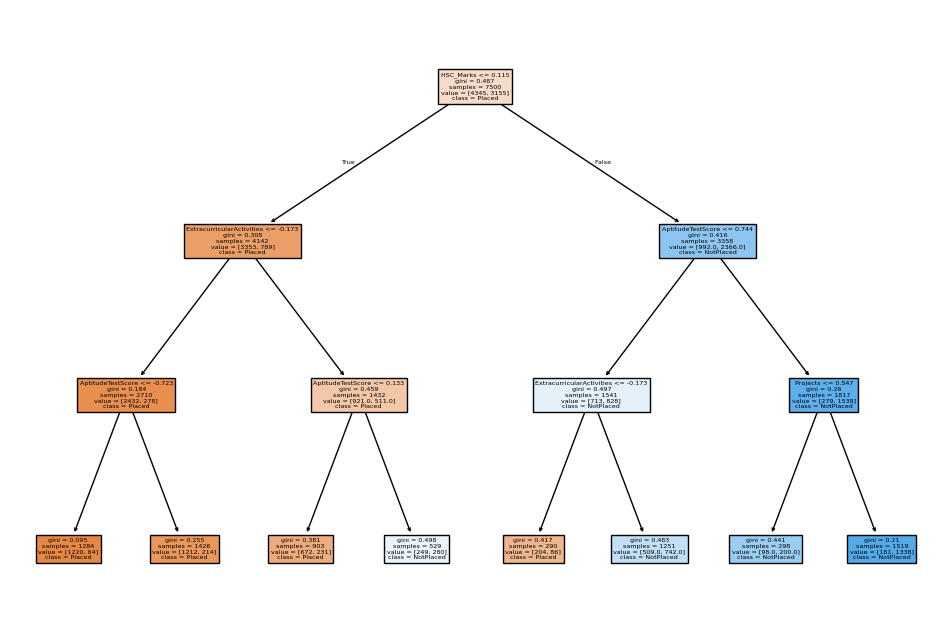

In [ ]:
clf=DecisionTreeClassifier(max_depth=3,min_samples_leaf=5,min_samples_split=10)
clf.fit(x_train_scaled,y_train)
plt.figure(figsize=(12,8))
plot_tree(clf,filled=True,feature_names=x.columns,class_names=['Placed','NotPlaced'])
plt.show()

In [ ]:

y_pred_model=model.predict(x_test_scaled)
y_pred_clf=clf.predict(x_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred_model))
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       0.76      0.75      0.75      1458
           1       0.65      0.67      0.66      1042

    accuracy                           0.72      2500
   macro avg       0.71      0.71      0.71      2500
weighted avg       0.72      0.72      0.72      2500

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1458
           1       0.69      0.81      0.75      1042

    accuracy                           0.77      2500
   macro avg       0.77      0.78      0.77      2500
weighted avg       0.78      0.77      0.77      2500



In [ ]:
importances=model.feature_importances_
feature_importances_df=pd.DataFrame({'feature':x_train.columns,'importance':importances})
feature_importances_df.sort_values(by='importance',ascending=False,inplace=True)

In [ ]:
feature_importances_df


,feature,importance
9,HSC_Marks,0.361608
4,AptitudeTestScore,0.141211
8,SSC_Marks,0.124385
0,CGPA,0.108697
5,SoftSkillsRating,0.088883
6,ExtracurricularActivities,0.047631
3,Workshops/Certifications,0.043347
1,Internships,0.035768
2,Projects,0.030097
7,PlacementTraining,0.018373


In [ ]:
# prompt: x=df.drop(['SoftSkillsRating','SoftSkillsRating','Workshops/Certifications','Internships','Projects','PlacementTraining'],axis=1)

x=data.drop(['SoftSkillsRating','Workshops/Certifications','Internships','Projects','PlacementTraining'],axis=1)
print(x.head())


In [ ]:
x=x.drop(['SoftSkillsRating','SoftSkillsRating','Workshops/Certifications','Internships','Projects','PlacementTraining'],axis=1)
y=data['PlacementStatus']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
scaler=StandardScaler()
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

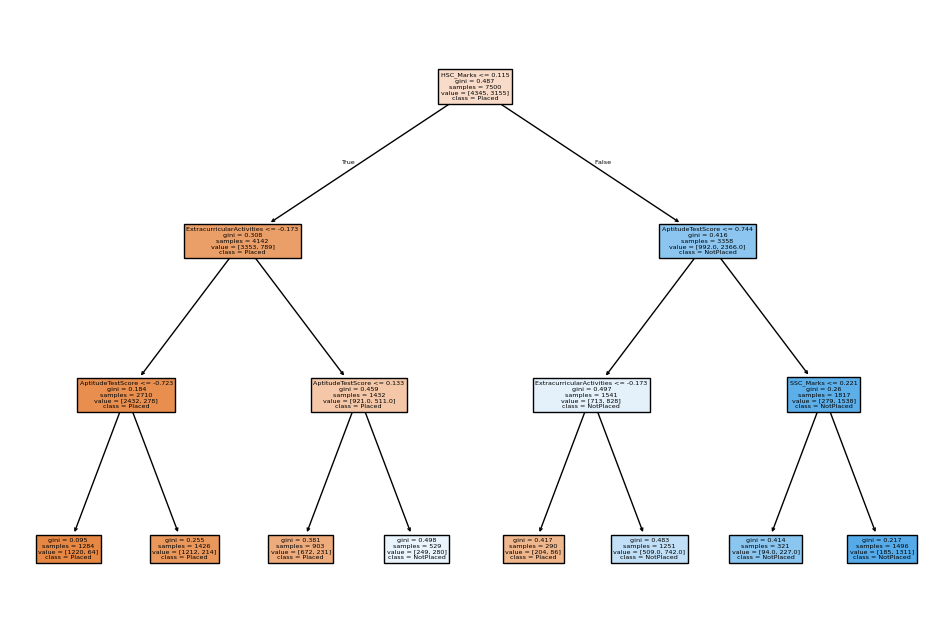

In [ ]:
clf=DecisionTreeClassifier(max_depth=3,min_samples_leaf=5,min_samples_split=10)
clf.fit(x_train_scaled,y_train)
plt.figure(figsize=(12,8))
plot_tree(clf,filled=True,feature_names=x.columns,class_names=['Placed','NotPlaced'])
plt.show()

In [ ]:
y_pred_clf=clf.predict(x_test_scaled)

In [ ]:
print(classification_report(y_test,y_pred_clf))

              precision    recall  f1-score   support

           0       0.85      0.74      0.79      1458
           1       0.69      0.81      0.75      1042

    accuracy                           0.77      2500
   macro avg       0.77      0.78      0.77      2500
weighted avg       0.78      0.77      0.77      2500

